In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential, model_from_json
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Rede Neural - Classificação Multiclesse
## HoldOut

In [2]:
# Importando bade de dados
base = pd.read_csv('iris.csv')

# Separando feature e target
previsores = base.iloc[:, 0:4].values
classe = base.iloc[:, 4].values

In [3]:
base.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1
labelencoder = LabelEncoder()
classe = labelencoder.fit_transform(classe)
classe_dummy = np_utils.to_categorical(classe)

In [6]:
# Dividindo entre treino e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe_dummy, test_size = 0.25)

In [7]:
# Criando estrutura da rede neural
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 3, activation = 'softmax'))
# Compilando rede neural
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
# Treinamento e teste do modelo
classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 500)

poch 324/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3226 - categorical_accuracy: 0.9605
Epoch 325/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3114 - categorical_accuracy: 0.9778
Epoch 326/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3297 - categorical_accuracy: 0.9472
Epoch 327/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3241 - categorical_accuracy: 0.9794
Epoch 328/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3177 - categorical_accuracy: 0.9421
Epoch 329/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3131 - categorical_accuracy: 0.9459
Epoch 330/500
12/12 [==============================] - 0s 1ms/step - loss: 0.2958 - categorical_accuracy: 0.9744
Epoch 331/500
12/12 [==============================] - 0s 1ms/step - loss: 0.3243 - categorical_accuracy: 0.9413
Epoch 332/500
12/12 [==============================] - 0s 2ms/step - loss: 0.2957 - categorical_a

In [11]:
# Realizando previsão do conjunto de teste
previsoes = classificador.predict(previsores_teste)
previsoes

array([[1.2645102e-08, 5.7434238e-02, 9.4256574e-01],
       [9.5376712e-01, 4.5585565e-02, 6.4730964e-04],
       [6.0094868e-07, 1.6667460e-01, 8.3332485e-01],
       [4.5805112e-03, 8.1610984e-01, 1.7930962e-01],
       [9.1365670e-05, 5.1224822e-01, 4.8766035e-01],
       [5.9888168e-04, 6.7470807e-01, 3.2469296e-01],
       [2.2576846e-07, 1.2844206e-01, 8.7155771e-01],
       [9.5376712e-01, 4.5585565e-02, 6.4730964e-04],
       [9.5376712e-01, 4.5585565e-02, 6.4730964e-04],
       [5.8990731e-03, 8.2934171e-01, 1.6475923e-01],
       [7.1515940e-05, 4.9077979e-01, 5.0914866e-01],
       [2.2189779e-06, 2.3232570e-01, 7.6767212e-01],
       [5.5958735e-09, 4.5436841e-02, 9.5456308e-01],
       [6.9211303e-08, 9.2839107e-02, 9.0716088e-01],
       [4.6664518e-08, 8.3157018e-02, 9.1684300e-01],
       [1.7834596e-01, 7.8583550e-01, 3.5818495e-02],
       [5.0985290e-07, 1.5963766e-01, 8.4036183e-01],
       [5.0749483e-12, 5.7839910e-03, 9.9421602e-01],
       [6.0318093e-06, 2.949

In [9]:
previsoes = (previsoes > 0.5)
previsoes

array([[False, False,  True],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [False,  True, False],
       [False, False,  True],
       [False, False,  True],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [False, False,  True],
       [ True, False, False],
       [ True, False, False],
       [False, False,  True],
       [ True, False, False],
       [False,  True, False],
       [False,  True, False],
       [False,  True, False],
       [ T

### Métricas de Avaliação

In [14]:
# Tratando valores para matriz de confusão
classe_teste2 = [np.argmax(t) for t in classe_teste]
previsoes2 = [np.argmax(t) for t in previsoes]

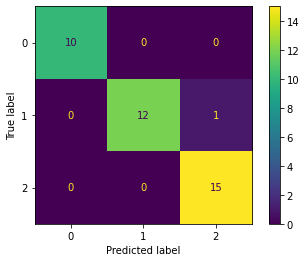

In [17]:
# Matriz de confusão
matriz = confusion_matrix(classe_teste2, previsoes2)
cm_display = ConfusionMatrixDisplay(matriz).plot()

In [20]:
# Accuracy usando keras
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

2/2 [==============================] - 0s 3ms/step - loss: 0.1941 - categorical_accuracy: 0.9737


[0.19407492876052856, 0.9736841917037964]

## Salvando e recuperando Rede Neural

In [ ]:
# Criando objeto json com estrutura da rede neural
classificador_json = classificador.to_json()

# Sanvando em disco arquivo com rede neural
with open('ClassificadorIris.json', 'w') as json_file:
    json_file.write(classificador_json)

# Salvando os pesos da rede neural
classificador.save_weights('ClassificadorIris.h5')

In [ ]:
# Nova instância para teste
novo = np.array([[5.1, 3.5, 1.4, 0.2]])

# Realizando previsão
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)
previsao

array([[ True, False, False]])

In [ ]:
# Carregando arquivo e lendo parâmetros da rede neural
arquivo = open('ClassificadorIris.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

# Atribuindo estrutura e pessos da rede neural
classificador = model_from_json(estrutura_rede)
classificador.load_weights('ClassificadorIris.h5')

# Realizando previsão
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)
previsao

array([[ True, False, False]])

# Rede Neural - Classificação Multiclasse
## Validação Cruzada com K-fold 

In [21]:
previsores.shape, type(previsores)

((150, 4), numpy.ndarray)

In [22]:
classe.shape, type(classe)

((150,), numpy.ndarray)

In [ ]:
# Criando função para rede neural
def criar_rede():
    # Criando estrutura da rede neural
    classificador = Sequential()
    classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
    classificador.add(Dense(units = 4, activation = 'relu'))
    classificador.add(Dense(units = 3, activation = 'softmax'))
    # Compilando rede neural
    classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])
    
    return classificador

In [ ]:
# Parâmetros para treinamento, usando KerasClassifier
classificador = KerasClassifier(build_fn = criar_rede, epochs = 500, batch_size = 10)

In [ ]:
# Executando treinamento e teste usando validação cruzada com 10 folds
resultados = cross_val_score(estimator = classificador, X = previsores, y = classe, scoring = 'accuracy', cv = 10)

 categorical_accuracy: 0.9917
Epoch 336/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0995 - categorical_accuracy: 0.9967
Epoch 337/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0958 - categorical_accuracy: 0.9921
Epoch 338/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1040 - categorical_accuracy: 0.9845
Epoch 339/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1086 - categorical_accuracy: 0.9973
Epoch 340/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0876 - categorical_accuracy: 0.9973
Epoch 341/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1027 - categorical_accuracy: 0.9973
Epoch 342/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1032 - categorical_accuracy: 0.9900
Epoch 343/500
14/14 [==============================] - 0s 1ms/step - loss: 0.1167 - categorical_accuracy: 0.9786
Epoch 344/500
14/14 [==============================] - 0s 1ms/step

In [ ]:
# Média dos folds
media = resultados.mean()
media

0.8600000000000001

In [ ]:
# Desvio padrão dos folds
desvio = resultados.std()
desvio

0.29881246441353293

# Rede Neural - Classificação Multiclesse
## Validação Cruzada com K-fold e GridSearchCV

In [5]:
# Criando função para rede neural
def criarRede(neurons, activation, kernel_initializer, dropout, optimizer):
    # Criando estrutura da rede neural
    classificador = Sequential()
    classificador.add(Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer, input_dim = 4))
    classificador.add(Dropout(dropout))
    classificador.add(Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer))
    classificador.add(Dropout(dropout))
    classificador.add(Dense(units = 3, activation = 'softmax'))
    # Compilando rede neural
    classificador.compile(optimizer = optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

    return classificador

In [6]:
# Parâmetros para treinamento, usando KerasClassifier
classificador = KerasClassifier(build_fn = criarRede)

# Parâmetros para o GridSearchCV
parametros = {
    'batch_size': [10, 30],
    'epochs': [100, 300],
    'dropout': [0.2, 0.3],
    'optimizer': ['adam', 'sgd'],
    'kernel_initializer': ['random_uniform', 'normal'],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'neurons': [4, 8, 16]
}

In [7]:
# Parâmetros para o execução do GridSearchCV
grid_search = GridSearchCV(estimator = classificador, param_grid = parametros, cv = 2)

In [8]:
# Executando treinamento e teste usando validação cruzada com 5 folds e GridSearchCV
grid_search = grid_search.fit(previsores, classe)

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch 209/300
3/3 [==============================] - 0s 6ms/step - loss: 0.7037 - accuracy: 0.6392
Epoch 210/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6272 - accuracy: 0.7108
Epoch 211/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6783 - accuracy: 0.7000
Epoch 212/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6634 - accuracy: 0.6350
Epoch 213/300
3/3 [==============================] - 0s 4ms/step - loss: 0.7062 - accuracy: 0.5817
Epoch 214/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6564 - accuracy: 0.6700
Epoch 215/300
3/3 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.6308
Epoch 216/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6850
Epoch 217/300
3/3 [==============================] - 0s 4ms/step - loss: 0.6470 - accuracy: 0.6183
Epoch 218/300
3/3 [==============================]

In [9]:
# Melhores parâmetros encontrado pelo GridSearchCV
melhores_parametros = grid_search.best_params_
melhores_parametros

{'activation': 'relu',
 'batch_size': 10,
 'dropout': 0.2,
 'epochs': 300,
 'kernel_initializer': 'normal',
 'neurons': 16,
 'optimizer': 'sgd'}

In [10]:
# Melhor precisão encontrada
melhor_precisao = grid_search.best_score_
melhor_precisao

0.6666666716337204